<a href="https://colab.research.google.com/github/AKAEon/DataManegment/blob/main/Mental_Health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data = pd.read_table("/content/drive/MyDrive/Data_Manegment/Mental health Depression disorder Data.csv", sep = ',', index_col='index')
data.head()

<ipython-input-17-e8dafffc2493>:1: DtypeWarning:

Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.



,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
data

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entity                     108553 non-null  object 
 1   Code                       103141 non-null  object 
 2   Year                       108553 non-null  object 
 3   Schizophrenia (%)          25875 non-null   object 
 4   Bipolar disorder (%)       19406 non-null   object 
 5   Eating disorders (%)       100236 non-null  object 
 6   Anxiety disorders (%)      6468 non-null    float64
 7   Drug use disorders (%)     6468 non-null    float64
 8   Depression (%)             6468 non-null    float64
 9   Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), object(6)
memory usage: 9.1+ MB


In [18]:
table_1_data = data.iloc[:6468].copy()
table_1_data.columns = ['country', 'country_code', 'year', 'schizophrenia', 'bipolar_disorder',
                        'eating_disorders', 'anxiety_disorders',
                        'drug_use_disorders', 'depression',
                        'alcohol_use_disorders']
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                6468 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   6468 non-null   object 
 3   schizophrenia          6468 non-null   object 
 4   bipolar_disorder       6468 non-null   object 
 5   eating_disorders       6468 non-null   object 
 6   anxiety_disorders      6468 non-null   float64
 7   drug_use_disorders     6468 non-null   float64
 8   depression             6468 non-null   float64
 9   alcohol_use_disorders  6468 non-null   float64
dtypes: float64(4), object(6)
memory usage: 555.8+ KB


In [19]:
table_1_data['country'].loc[table_1_data['country_code'].isnull()].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

In [20]:
table_1_data.dropna(axis=0, inplace = True)
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                5488 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   5488 non-null   object 
 3   schizophrenia          5488 non-null   object 
 4   bipolar_disorder       5488 non-null   object 
 5   eating_disorders       5488 non-null   object 
 6   anxiety_disorders      5488 non-null   float64
 7   drug_use_disorders     5488 non-null   float64
 8   depression             5488 non-null   float64
 9   alcohol_use_disorders  5488 non-null   float64
dtypes: float64(4), object(6)
memory usage: 471.6+ KB


In [21]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                5488 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   5488 non-null   object 
 3   schizophrenia          5488 non-null   object 
 4   bipolar_disorder       5488 non-null   object 
 5   eating_disorders       5488 non-null   object 
 6   anxiety_disorders      5488 non-null   float64
 7   drug_use_disorders     5488 non-null   float64
 8   depression             5488 non-null   float64
 9   alcohol_use_disorders  5488 non-null   float64
dtypes: float64(4), object(6)
memory usage: 471.6+ KB


In [27]:
table_1_data.iloc[:, 3:] = table_1_data.iloc[:, 3:].apply(pd.to_numeric)

In [32]:
table_1_data['year'] = table_1_data['year'].astype(int)
table_1_data['schizophrenia'] = table_1_data['schizophrenia'].astype(float)
table_1_data['bipolar_disorder'] = table_1_data['bipolar_disorder'].astype(float)
table_1_data['eating_disorders'] = table_1_data['eating_disorders'].astype(float)

In [33]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                5488 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   5488 non-null   int64  
 3   schizophrenia          5488 non-null   float64
 4   bipolar_disorder       5488 non-null   float64
 5   eating_disorders       5488 non-null   float64
 6   anxiety_disorders      5488 non-null   float64
 7   drug_use_disorders     5488 non-null   float64
 8   depression             5488 non-null   float64
 9   alcohol_use_disorders  5488 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 471.6+ KB


In [34]:
table_1_data.to_csv('/content/drive/MyDrive/Data_Manegment/Table_1_data_cleaned.csv')

In [55]:
table_1_data = pd.read_table("/content/drive/MyDrive/Data_Manegment/Table_1_data_cleaned.csv", sep = ',', index_col='index')
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                5488 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   5488 non-null   int64  
 3   schizophrenia          5488 non-null   float64
 4   bipolar_disorder       5488 non-null   float64
 5   eating_disorders       5488 non-null   float64
 6   anxiety_disorders      5488 non-null   float64
 7   drug_use_disorders     5488 non-null   float64
 8   depression             5488 non-null   float64
 9   alcohol_use_disorders  5488 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 471.6+ KB


In [38]:
table_2_data = data.iloc[6469:54276, :6].copy()
table_2_data.columns = ['country', 'country_code', 'year','males_share', 'females_share','population']
table_2_data.dropna(axis=0, inplace = True)

table_2_data['year'] = table_2_data['year'].astype(int)
table_2_data['males_share'] = table_2_data['males_share'].astype(float)
table_2_data['females_share'] = table_2_data['females_share'].astype(float)
table_2_data['population'] = table_2_data['population'].astype(float)

table_2_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 6659 to 54273
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        5488 non-null   object 
 1   country_code   5488 non-null   object 
 2   year           5488 non-null   int64  
 3   males_share    5488 non-null   float64
 4   females_share  5488 non-null   float64
 5   population     5488 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 300.1+ KB


In [39]:
table_2_data.to_csv('/content/drive/MyDrive/Data_Manegment/Table_2_data_cleaned.csv')

In [40]:
table_2_data = pd.read_table("/content/drive/MyDrive/Data_Manegment/Table_2_data_cleaned.csv", sep = ',')
table_2_data.head()

,index,country,country_code,year,males_share,females_share,population
0,6659,Afghanistan,AFG,1990,3.499982,4.647815,12412000.0
1,6660,Afghanistan,AFG,1991,3.503947,4.655772,13299000.0
2,6661,Afghanistan,AFG,1992,3.508912,4.662066,14486000.0
3,6662,Afghanistan,AFG,1993,3.513429,4.669012,15817000.0
4,6663,Afghanistan,AFG,1994,3.515578,4.673050,17076000.0


In [58]:
def load_gpd_world():
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Fix missing country codes in +data...
    world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
    world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
    world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
    world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

    # otherwise 2 rows values for Somalia
    world = world.dissolve(by='iso_a3').reset_index()

    return world

In [59]:
# Load global Geometries from naturalearth
world = load_gpd_world()
world = world.rename(columns={'iso_a3':'country_code'})

table_1_data = world[['country_code', 'continent', 'geometry']].merge(table_1_data)
table_1_data

<ipython-input-58-ec5d52e01cd0>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,country_code,continent,geometry,country,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,ZWE,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
4728,ZWE,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
4729,ZWE,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
4730,ZWE,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [56]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                5488 non-null   object 
 1   country_code           5488 non-null   object 
 2   year                   5488 non-null   int64  
 3   schizophrenia          5488 non-null   float64
 4   bipolar_disorder       5488 non-null   float64
 5   eating_disorders       5488 non-null   float64
 6   anxiety_disorders      5488 non-null   float64
 7   drug_use_disorders     5488 non-null   float64
 8   depression             5488 non-null   float64
 9   alcohol_use_disorders  5488 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 471.6+ KB


In [139]:
# Table 1
numeric_columns = table_1_data.select_dtypes(include=['float64', 'int64'])

plot_df = (numeric_columns.loc[table_1_data.year == 2017]
               .groupby(table_1_data['continent'])
               .mean()
               .reset_index()
               .drop(columns=['year'])
               .melt(id_vars='continent'))


In [146]:
fig = px.bar(plot_df, x="variable", y="value",
             color="continent", barmode="group",
             title="Mental Health Disorder per Continent in 2017",
             height=500)


In [147]:
fig.update_layout(
    yaxis_title="Share in %",
    xaxis_title="",
    font_family="Courier New",
    font_size=18,
    legend_title="",
)
fig.show()

In [142]:
import plotly.io as pio
pio.write_html(fig, 'D:\aaaa_set2\STQD6324_Data_Managment\assignment_1\plot.html')

In [13]:
sns.set_theme(style="white")
disorder_correlation = table_1_data.loc[table_1_data.year == 2017,['schizophrenia', 'bipolar_disorder',
                        'eating_disorders', 'anxiety_disorders',
                        'drug_use_disorders', 'depression',
                        'alcohol_use_disorders']].corr()


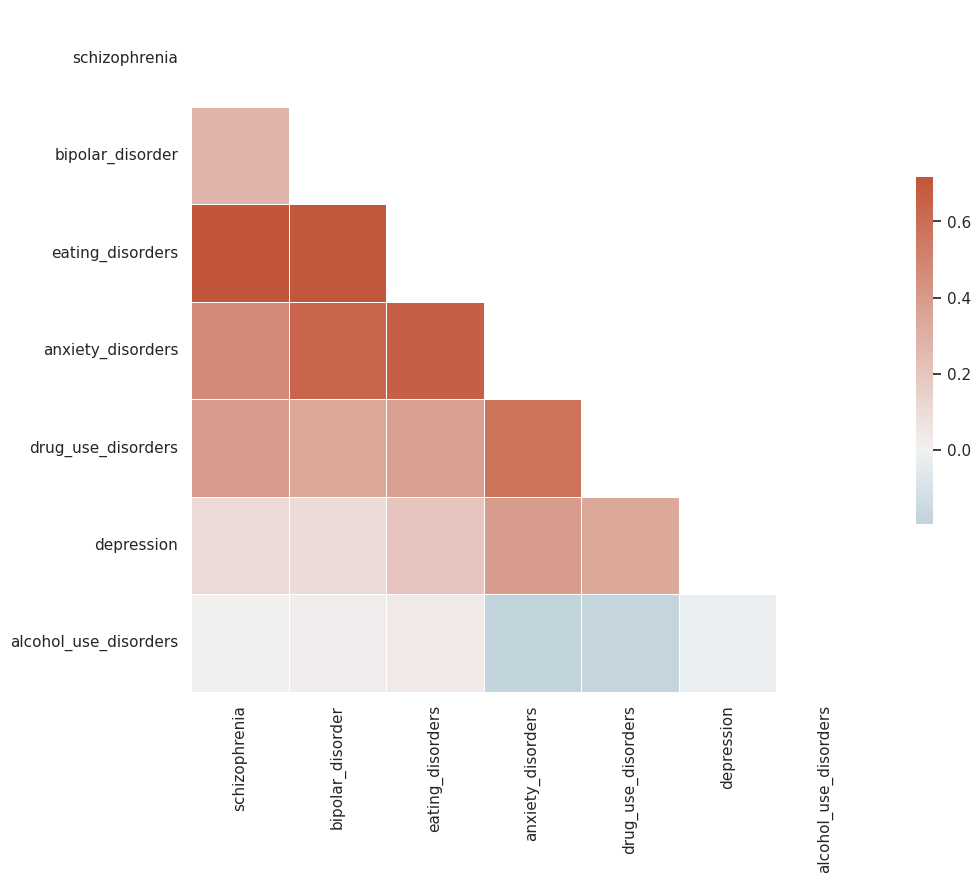

In [14]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(disorder_correlation, dtype=bool))
highest_correlation = disorder_correlation[disorder_correlation != 1].max().max()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(disorder_correlation, mask=mask, cmap=cmap, vmax=highest_correlation, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [72]:
data_2017 = table_1_data[table_1_data['year'] == 2017]
data_1990 = table_1_data[table_1_data['year'] == 1990]

data_2017.head()

,country_code,continent,geometry,country,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
27,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
55,AGO,Africa,"MULTIPOLYGON (((12.73517 -5.96568, 13.02487 -5...",Angola,2017,0.172794,0.623904,0.173643,3.296906,0.519556,4.160484,1.378244
83,ALB,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
111,ARE,Asia,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,2017,0.210718,0.806413,0.262207,4.263912,2.915549,2.877426,0.755908
139,ARG,South America,"MULTIPOLYGON (((-68.25000 -53.10000, -67.75000...",Argentina,2017,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515


In [71]:
data_1990.head()

,country_code,continent,geometry,country,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
28,AGO,Africa,"MULTIPOLYGON (((12.73517 -5.96568, 13.02487 -5...",Angola,1990,0.166446,0.615109,0.137854,3.208217,0.513618,4.181509,1.489683
56,ALB,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,1990,0.193413,0.695013,0.130782,3.327587,0.497616,2.139903,1.709465
84,ARE,Asia,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,1990,0.204919,0.798055,0.297525,4.265334,1.947121,3.057251,0.759560
112,ARG,South America,"MULTIPOLYGON (((-68.25000 -53.10000, -67.75000...",Argentina,1990,0.194422,0.755674,0.323686,6.165921,0.919424,3.569180,1.918939


<class 'geopandas.geoseries.GeoSeries'>
Index: 338 entries, 0 to 4731
Series name: None
Non-Null Count  Dtype   
--------------  -----   
0 non-null      geometry
dtypes: geometry(1)
memory usage: 5.3 KB


<ipython-input-69-be5ead59362d>:1: FutureWarning:

'-' operator will be deprecated. Use the 'difference' method instead.

/usr/local/lib/python3.10/dist-packages/geopandas/base.py:31: UserWarning:

The indices of the two GeoSeries are different.



In [93]:
df = data_2017.drop(columns='geometry')
df.dtypes


country_code              object
continent                 object
country                   object
year                       int64
schizophrenia            float64
bipolar_disorder         float64
eating_disorders         float64
anxiety_disorders        float64
drug_use_disorders       float64
depression               float64
alcohol_use_disorders    float64
dtype: object

In [129]:
inform = data_2017.select_dtypes(include=['object']).reset_index()
inform = inform.drop(columns=['index'])
inform

,country_code,continent,country
0,AFG,Asia,Afghanistan
1,AGO,Africa,Angola
2,ALB,Europe,Albania
3,ARE,Asia,United Arab Emirates
4,ARG,South America,Argentina
...,...,...,...
164,VUT,Oceania,Vanuatu
165,YEM,Asia,Yemen
166,ZAF,Africa,South Africa
167,ZMB,Africa,Zambia


In [111]:
numeric_columns_2017 = data_2017.select_dtypes(include=['float64']).apply(pd.to_numeric).reset_index()
numeric_columns_1990 = data_1990.select_dtypes(include=['float64']).apply(pd.to_numeric).reset_index()


,index,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,27,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,55,0.172794,0.623904,0.173643,3.296906,0.519556,4.160484,1.378244
2,83,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
3,111,0.210718,0.806413,0.262207,4.263912,2.915549,2.877426,0.755908
4,139,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515
...,...,...,...,...,...,...,...,...
164,4619,0.214734,0.427419,0.106462,3.218816,0.698906,3.122695,1.213941
165,4647,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
166,4675,0.181937,0.636613,0.214718,3.992830,0.921499,3.745871,1.550514
167,4703,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [130]:
numeric_columns_diff = numeric_columns_2017 - numeric_columns_1990
numeric_columns_diff.drop(columns=['index'], inplace=True)
numeric_columns_diff

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,0.005598,0.010310,0.005287,0.053651,0.796852,0.064516,-0.011187
1,0.006348,0.008795,0.035789,0.088689,0.005938,-0.021025,-0.111439
2,0.007612,0.009467,0.043264,0.057658,0.019998,0.068511,0.128490
3,0.005799,0.008358,-0.035318,-0.001422,0.968428,-0.179825,-0.003652
4,0.003672,0.017702,0.080347,0.117757,0.089477,0.096308,-0.094424
...,...,...,...,...,...,...,...
164,0.002466,0.003456,0.007649,0.059861,0.024149,0.005682,0.040633
165,0.001825,0.005644,0.013125,0.023537,0.341080,0.048809,0.005063
166,0.004247,0.010154,0.016676,0.041005,-0.290665,-0.013042,-0.108189
167,0.005030,0.004778,0.018740,0.055831,0.000848,0.076536,0.002573


In [131]:
df = pd.concat([inform, numeric_columns_diff], axis=1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_code           169 non-null    object 
 1   continent              169 non-null    object 
 2   country                169 non-null    object 
 3   schizophrenia          169 non-null    float64
 4   bipolar_disorder       169 non-null    float64
 5   eating_disorders       169 non-null    float64
 6   anxiety_disorders      169 non-null    float64
 7   drug_use_disorders     169 non-null    float64
 8   depression             169 non-null    float64
 9   alcohol_use_disorders  169 non-null    float64
dtypes: float64(7), object(3)
memory usage: 13.3+ KB


In [148]:
numeric_columns = df.select_dtypes(include=['float64'])

plot_df = (numeric_columns
               .groupby(df['continent'])
               .mean()
               .reset_index()
               .melt(id_vars='continent'))
fig = px.bar(plot_df, x="variable", y="value",
             color="continent", barmode="group",
             title="Trends in mental health disorders from 1990 to 2017",
             height=500)
fig.update_layout(
    yaxis_title="Share in %",
    xaxis_title="",
    font_family="Courier New",
    font_size=18,
    legend_title="",
)
fig.show()

In [149]:
import plotly.io as pio
pio.write_html(fig, '/content/drive/MyDrive/Data_Manegment/plot_27.html')